<a href="https://colab.research.google.com/github/albertklorer/rotten-tomatoes-dnn/blob/master/rotten_tomatoes_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install sister

Predicting freshness of Rotten Tomatoes reviews using deep learning. Activate GPU hardware accelerator and internet access before running. Dataset is accessible [here](https://github.com/nicolas-gervais/rotten-tomatoes-dataset) and must be uploaded into files for the notebook to be run.

Read csv to dataframe, clean & split.

In [16]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import sister
import tensorflow as tf

# read csv
data = pd.read_csv('rotten_tomatoes_reviews.csv')

# strip bad characters
data['Review'].replace(to_replace='([^\s\w]|_)+', value='',inplace=True,regex=True)

# strip string of trailing or leading blank spaces and uppercase characters
data['Review'] = data['Review'].str.strip().str.lower()

data.head

<bound method NDFrame.head of         Freshness                                             Review
0               1  manakamana doesnt answer any questions yet mak...
1               1  wilfully offensive and powered by a chestthump...
2               0  it would be difficult to imagine material more...
3               0  despite the gusto its star brings to the role ...
4               0  if there was a good idea at the core of this f...
...           ...                                                ...
479995          0  zemeckis seems unable to admit that the motion...
479996          1  movies like the kids are all right  beautifull...
479997          0  filmsavvy audiences soon will catch onto winte...
479998          1                          an odd yet enjoyable film
479999          1  no other animation studio even our beloved pix...

[480000 rows x 2 columns]>

Vectorize reviews using SISTER.

In [17]:
embedder = sister.MeanEmbedding(lang="en")
for i in range(len(data['Review'])):
  data['Review'][i] = embedder(data['Review'][i])

# drop columns containing null values
data.dropna()

data.head

Loading model...



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<bound method NDFrame.head of         Freshness                                             Review
0               1  [0.18384874, -0.0091378745, 0.15983199, -0.184...
1               1  [0.16536771, 0.11255017, 0.12681499, -0.109842...
2               0  [0.13901259, 0.065217115, 0.23082313, -0.22655...
3               0  [0.012283215, -0.058382217, 0.083909534, -0.15...
4               0  [0.1516958, -0.006825123, 0.11576117, -0.20499...
...           ...                                                ...
479995          0  [0.14600046, 0.0019746097, 0.1585292, -0.14987...
479996          1  [0.11742728, 0.033769563, 0.15254678, -0.18786...
479997          0  [0.068726666, 0.020809036, 0.09510329, -0.1425...
479998          1  [0.15909594, -0.007812688, 0.22323807, -0.3103...
479999          1  [0.114034325, -0.10030422, 0.16722582, -0.2100...

[480000 rows x 2 columns]>

Split training and testing data.

In [43]:
from sklearn.model_selection import train_test_split

# divide data into features and labels
x = np.stack(data['Review'])
y = data['Freshness'].to_numpy()

# split train and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y)

(360000, 300)



Create model

In [0]:
model = tf.keras.models.Sequential()

# add input layer
model.add(
  tf.keras.layers.Dense(
    units=1024,
    input_dim=x_train.shape[1],
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    activation='tanh'
  ) 
)

# add hidden layer
model.add(
  tf.keras.layers.Dense(
      units=512,
      input_dim=1024,
      kernel_initializer='glorot_uniform',
      bias_initializer='zeros',
      activation='tanh'
    )
)

# add hidden layer
model.add(
  tf.keras.layers.Dense(
      units=264,
      input_dim=512,
      kernel_initializer='glorot_uniform',
      bias_initializer='zeros',
      activation='tanh'
    )
)

# add ouput layer
model.add(
  tf.keras.layers.Dense(
      units=1,
      input_dim=512,
      kernel_initializer='glorot_uniform',
      bias_initializer='zeros',
      activation='tanh'
  )
)

# define SGD optimizer
sgd_optimizer = tf.keras.optimizers.SGD(
    lr=0.0001, decay=1e-7, momentum=0.9
)

# compile model
model.compile(
    optimizer=sgd_optimizer,
    loss='mse',
    metrics=['acc']
)

Train model and get prediction accuracy

In [48]:
with tf.device('/gpu:0'):
  history = model.fit(x_train, y_train, epochs=15, verbose=1, validation_split=0.2)

score = model.evaluate(x=x_test, y=y_test)
print('Score: ', score)

Epoch 1/15
9000/9000 [==============================] - 22s 2ms/step - loss: 0.2306 - acc: 0.6226 - val_loss: 0.2199 - val_acc: 0.6548
Epoch 2/15
9000/9000 [==============================] - 22s 2ms/step - loss: 0.2151 - acc: 0.6653 - val_loss: 0.2120 - val_acc: 0.6748
Epoch 3/15
9000/9000 [==============================] - 21s 2ms/step - loss: 0.2101 - acc: 0.6753 - val_loss: 0.2093 - val_acc: 0.6763
Epoch 4/15
9000/9000 [==============================] - 22s 2ms/step - loss: 0.2080 - acc: 0.6801 - val_loss: 0.2074 - val_acc: 0.6834
Epoch 5/15
9000/9000 [==============================] - 22s 2ms/step - loss: 0.2069 - acc: 0.6823 - val_loss: 0.2065 - val_acc: 0.6864
Epoch 6/15
9000/9000 [==============================] - 21s 2ms/step - loss: 0.2064 - acc: 0.6830 - val_loss: 0.2060 - val_acc: 0.6870
Epoch 7/15
9000/9000 [==============================] - 22s 2ms/step - loss: 0.2060 - acc: 0.6833 - val_loss: 0.2059 - val_acc: 0.6883
Epoch 8/15
9000/9000 [==============================] -

Display graph of training

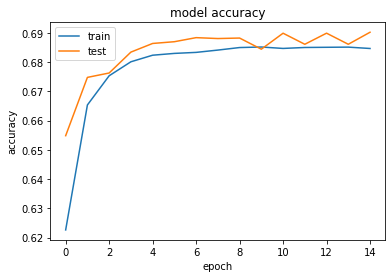

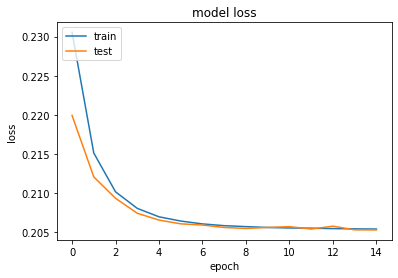

In [49]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()